# Прогнозирование отклика клиентов и оптимизация маркетинговых стратегий в банке с использованием моделей машинного обучения 

# Введение

Сегодня организации, которые нанимают специалистов по данным, особенно заинтересованы в портфолио кандидатов. Анализ маркетинговых данных организации является одним из самых типичных применений науки о данных и машинного обучения. Такой анализ определенно станет хорошим вкладом в портфолио.

# Цели



В общем, наборы данных, содержащие маркетинговые данные, могут использоваться для двух различных бизнес-целей:

1. Предсказание результатов маркетинговой кампании для каждого клиента и уточнение факторов, которые влияют на результаты кампании. Это помогает выяснить способы сделать маркетинговые кампании более эффективными.
2. Определение сегментов клиентов, используя данные клиентов, подписавшихся на срочный депозит. Это помогает идентифицировать профиль клиента, который с большей вероятностью приобретет продукт, и разработать более целевые маркетинговые кампании.

Этот набор данных содержит информацию о банковской маркетинговой кампании, и мы можем использовать его для оптимизации маркетинговых кампаний с целью привлечения большего числа клиентов к подписке на срочный депозит. Подробное описание содержания набора данных представлено на рессурсе [Kaggle](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit?scriptVersionId=11675860)

# Задачи 

Чтобы оптимизировать маркетинговые кампании с помощью набора данных, нам нужно выполнить следующие шаги:

1. Импортировать данные из набора и провести начальный высокоуровневый анализ: посмотреть количество строк, проверить наличие пропущенных значений, изучить столбцы набора данных и их значения в отношении результата кампании.
2. Очистить данные: удалить нерелевантные столбцы, справиться с пропущенными и некорректными значениями, преобразовать категориальные столбцы в фиктивные переменные (dummy variables).
3. Использовать методы машинного обучения для прогнозирования результатов маркетинговой кампании и выявления факторов, которые влияют на успех кампании.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


#  Загрузка и изучение данных

## Загрузка датасета

In [3]:
df = pd.read_csv("C:\datasets\\bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Загрузив дата сет и изучив его мы видим 
- 17 признаков в датасете 
    - 7 целочисленных признаков  
    - 10 катигорильных  признаков 
- 11162 столбца 
- люди в возрасте от  18 до 95 лет 
    - средний возраст 42 
    - медианный 39 
- баланс некоторых пользователей отрицательный ( минимальное значение -6847)  - возможно задолженость банку


## Анализ датасета


Поиск пропусков

In [7]:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

Посмотрим на значения категориальных столбцов.

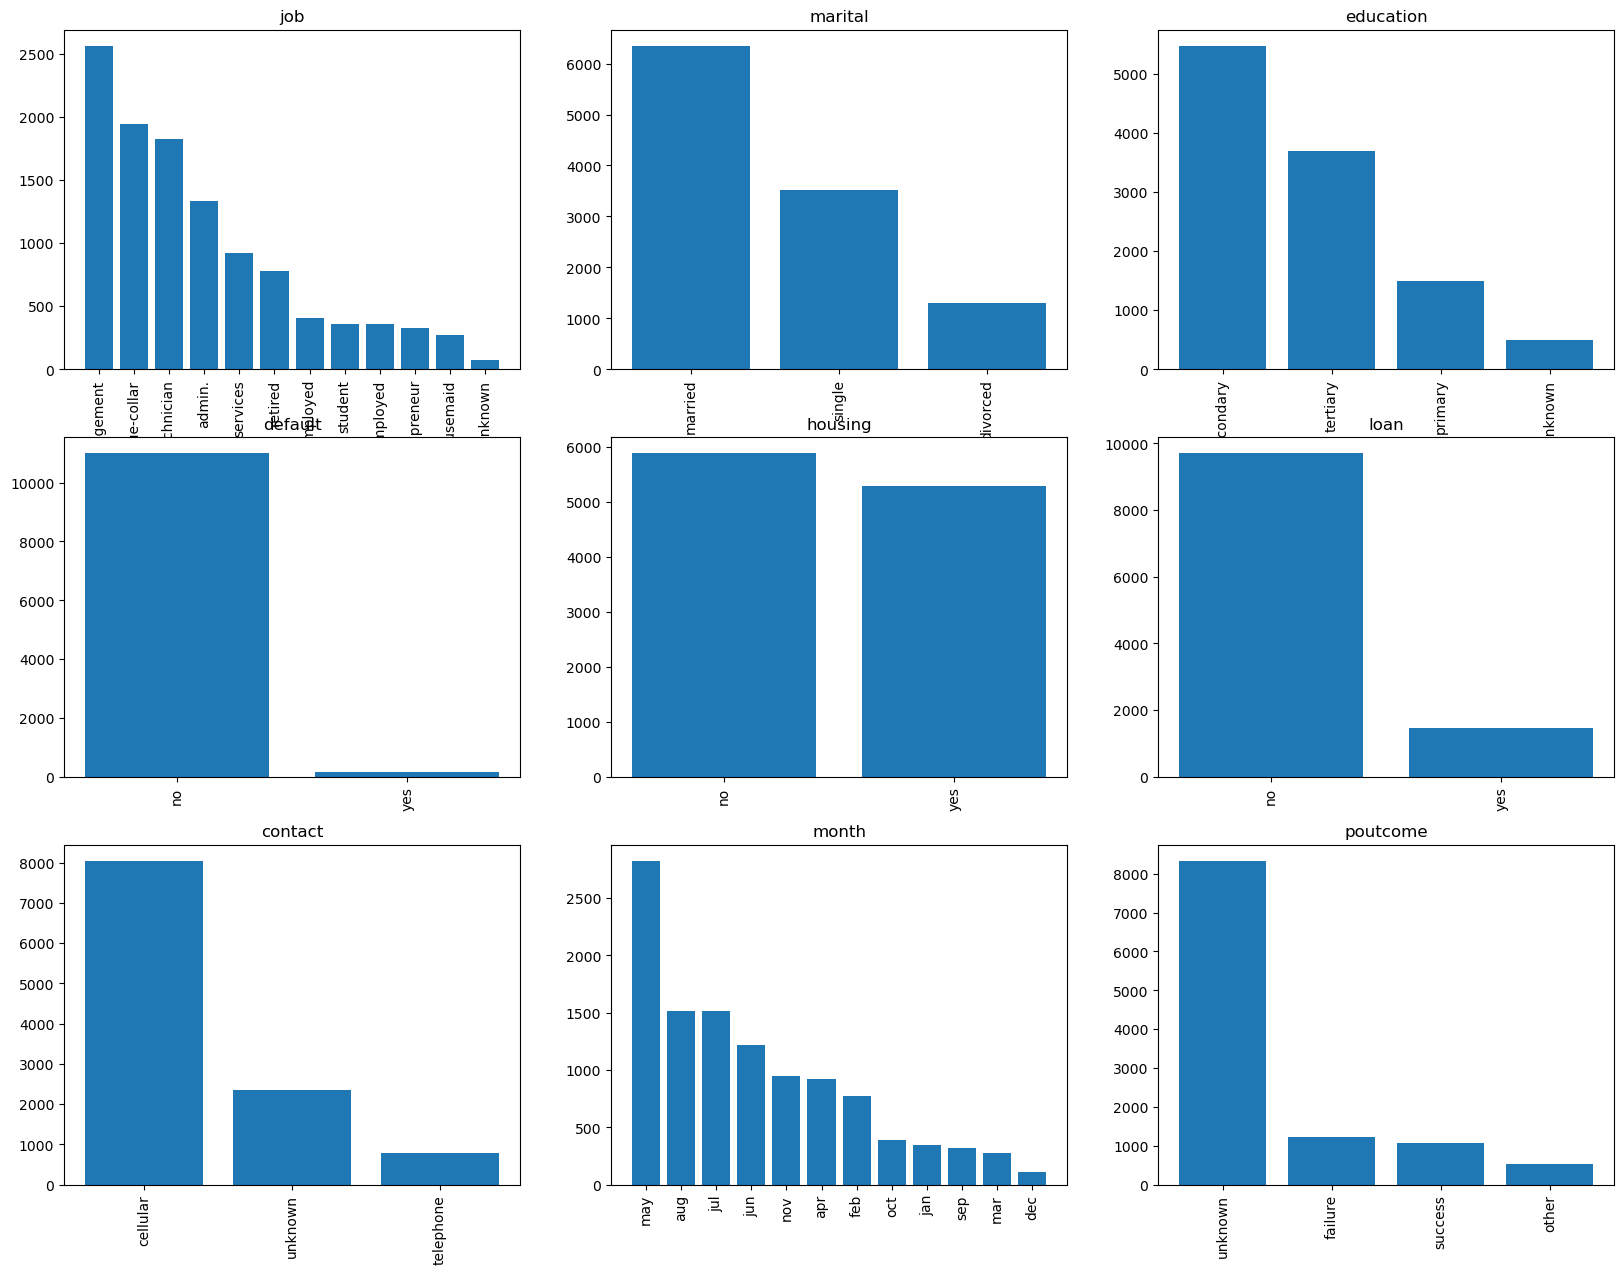

In [8]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

Теперь посмотрим на значения числовых столбцов

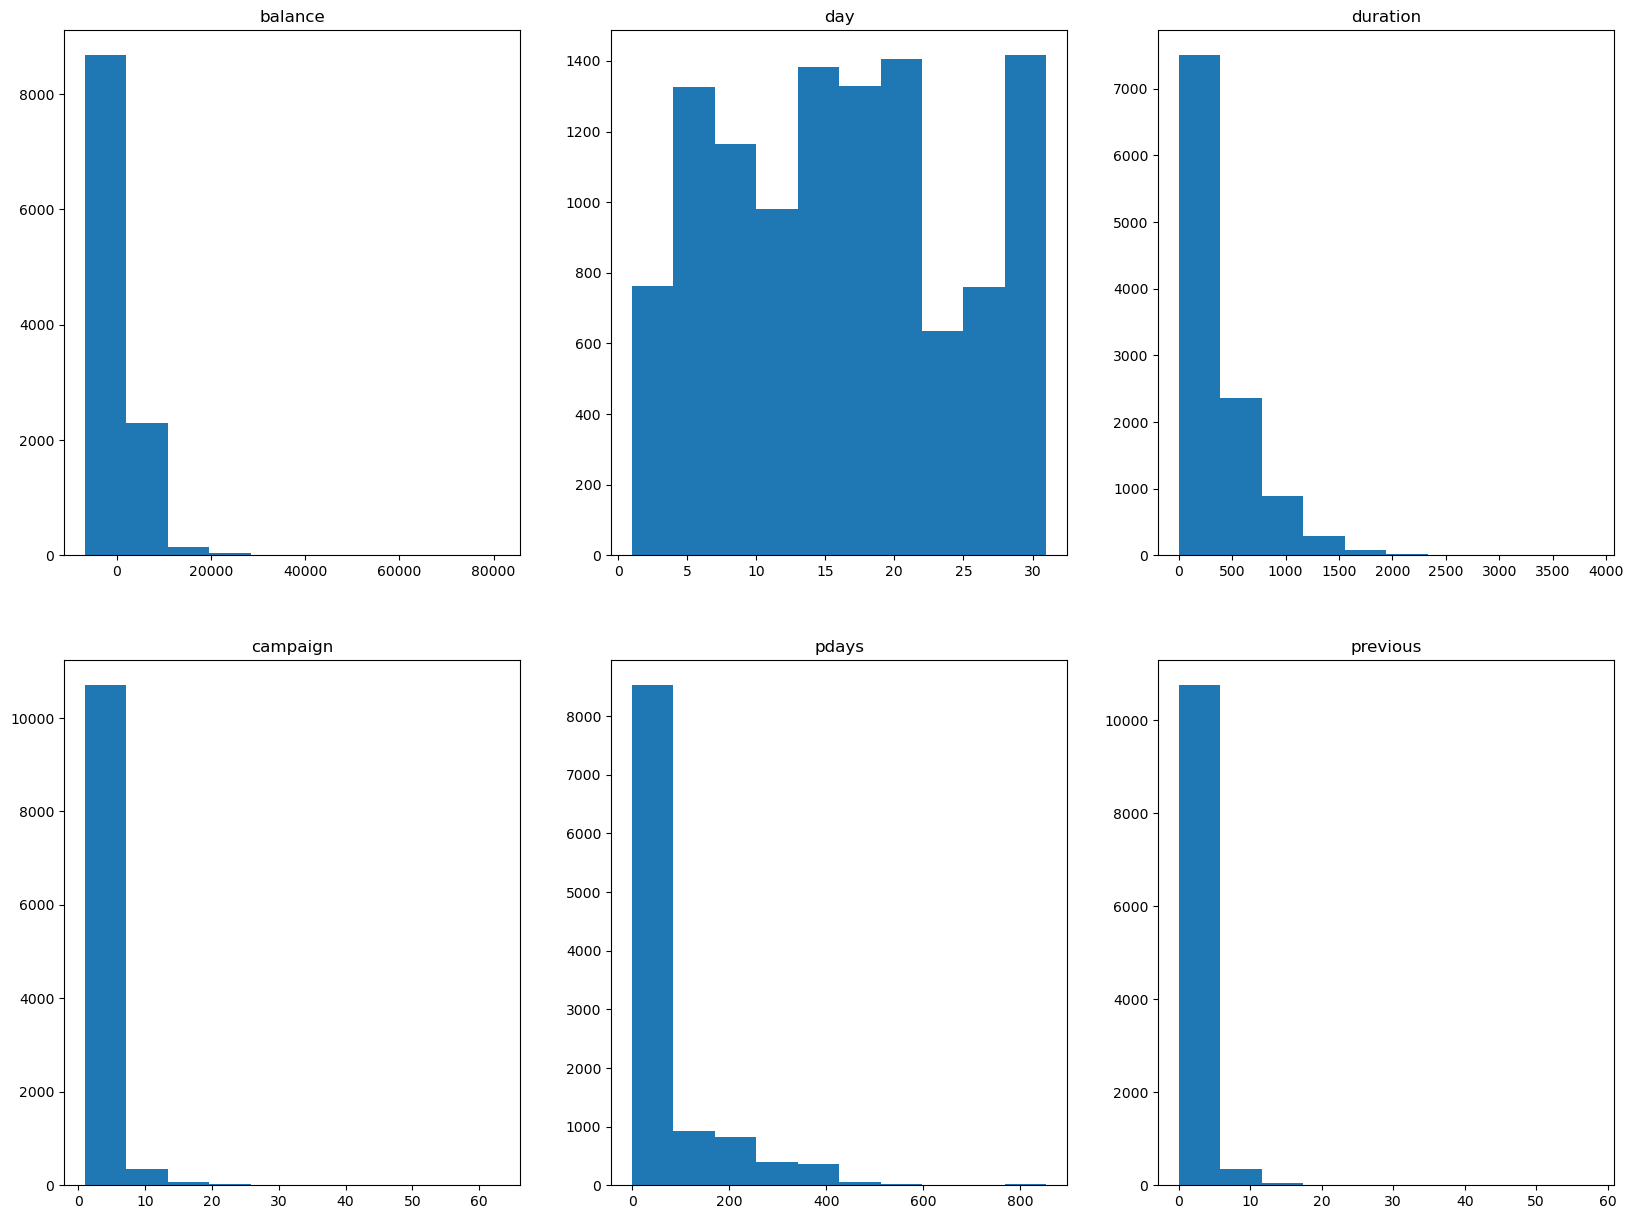

In [9]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

Можно заметить, что в числовых столбцах присутствуют выбросы (особенно в столбцах 'campaign', 'pdays' и 'previous'). Возможно, там есть некорректные значения (зашумлённые данные), поэтому стоит внимательнее посмотреть на эти данные и решить, как с ними поступить.
Давайте подробнее рассмотрим значения в столбцах 'campaign', 'pdays' и 'previous':

In [10]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Процент значений 'pdays' выше 400

In [11]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

Столбец 'pdays' содержит информацию о количестве дней, прошедших с момента последнего контакта с клиентом по предыдущей кампании. Более внимательно изучив данные 'pdays', можно заметить следующее:

- Лишь 1.2% значений превышают 400. Эти значения, скорее всего, являются выбросами, поэтому стоит рассмотреть возможность замены их на какое-то значение, например, среднее.
- Значение -1 может означать, что клиент ранее не контактировал с банком или данные отсутствуют.
- Поскольку мы не уверены в точном смысле значения -1, и учитывая, что такие значения составляют более 50% данных столбца, мы предлагаем удалить этот столбец из анализа.

Процент значений 'campaign' выше 20:

In [12]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

Столбец 'campaign' содержит количество контактов, проведённых в ходе текущей кампании с данным клиентом (включая последний контакт).

Значения 'campaign', превышающие 34, очевидно являются шумом. Поэтому мы заменим их на среднее значение показателя 'campaign' во время очистки данных.

Процент значений 'previous' выше 20:

In [13]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

Столбец 'previous' содержит количество контактов, проведённых с клиентом до текущей кампании (числовое значение).

Значения 'previous', превышающие 34, также выглядят очень подозрительно. Поэтому мы заменим их на среднее значение показателя 'previous' во время очистки данных.

## Анализ таргета 'deposit'

Особое внимание следует уделить целевому столбцу, информацию из которого мы будем предсказывать. В нашем случае это столбец 'deposit' (депозит), и мы должны сравнить его значения с другими столбцами.

В первую очередь посмотрим на распределение значений 'yes' (да) и 'no' (нет) в целевом столбце 'deposit'.

<AxesSubplot:title={'center':'Deposit value counts'}>

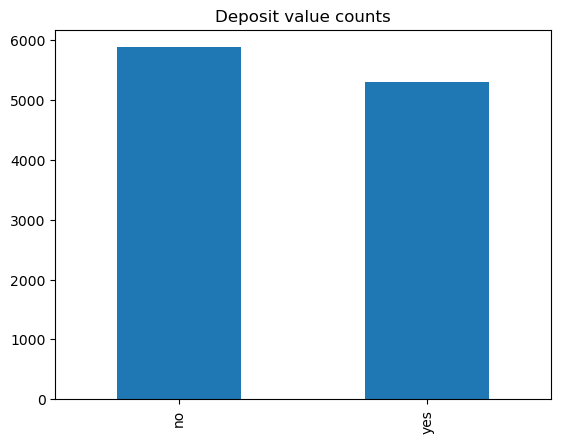

In [14]:
value_counts = df['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit value counts')

На диаграмме видно, что количество значений 'yes' и 'no' в столбце 'deposit' примерно одинаковое, поэтому мы можем использовать метрику точности (accuracy) для оценки модели, которая предсказывает результат

Теперь посмотрим, как значение столбца 'deposit' меняется в зависимости от значений других категориальных столбцов:

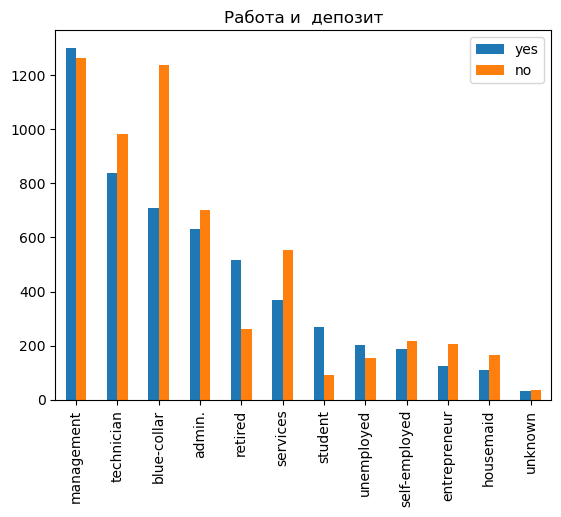

In [15]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Работа и  депозит');

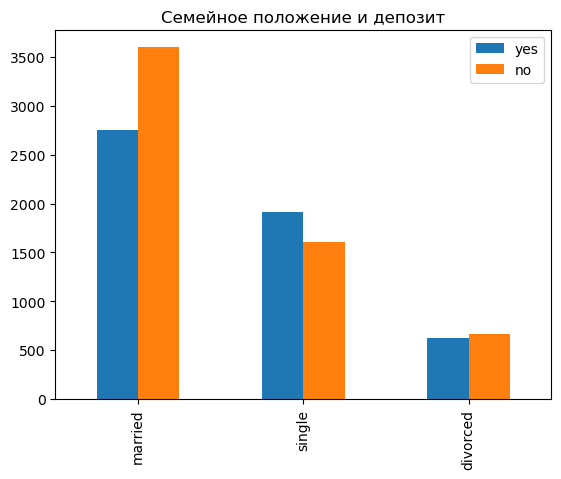

In [16]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Семейное положение и депозит');

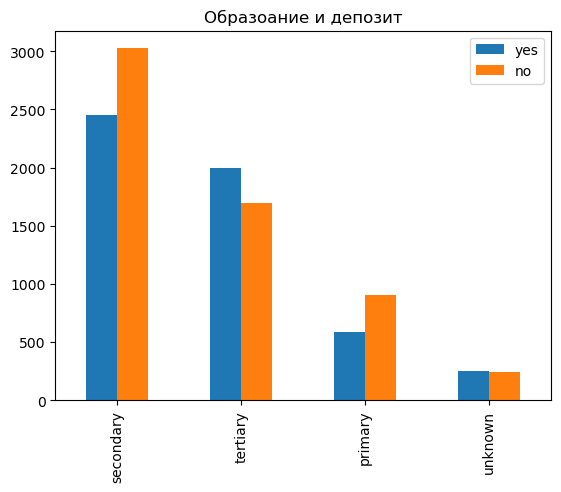

In [17]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Образоание и депозит');

<AxesSubplot:title={'center':'Тип контакта и депозит'}>

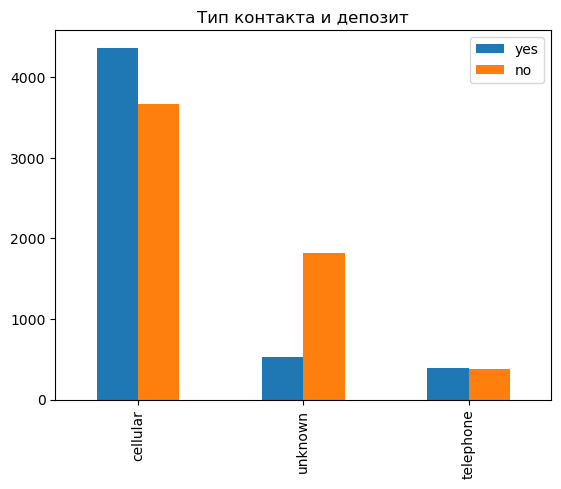

In [18]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Тип контакта и депозит')

На основании диаграмм можно сделать следующие выводы, исходя из нашего набора данных:

- Клиенты с профессиями 'blue-collar' (рабочие профессии) и 'services' (сфера услуг) реже подписываются на срочный депозит.
- Клиенты, состоящие в браке (married), реже решаются на подписку для депозита.
- Клиенты, с которыми связывались по мобильному телефону ('cellular'), также реже соглашаются на депозит.

Посмотрим, как данные из числовых столбцов влияют на депозитный счёт

In [19]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


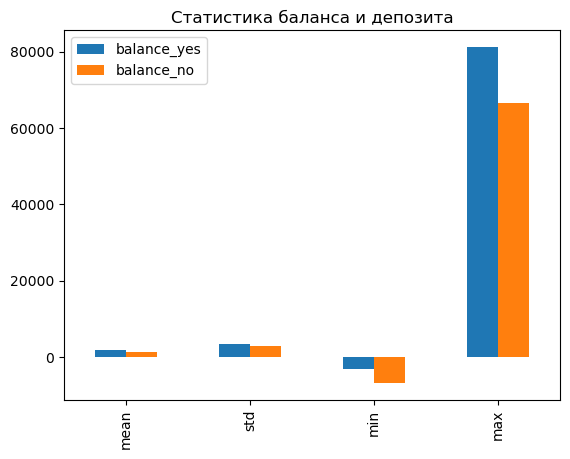

In [20]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Статистика баланса и депозита');

In [21]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (df[df['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


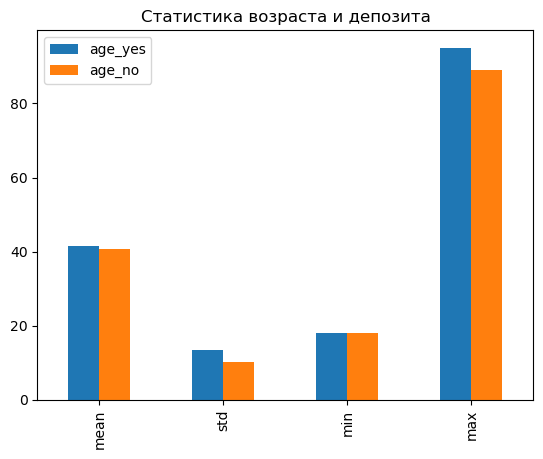

In [22]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Статистика возраста и депозита');

In [23]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


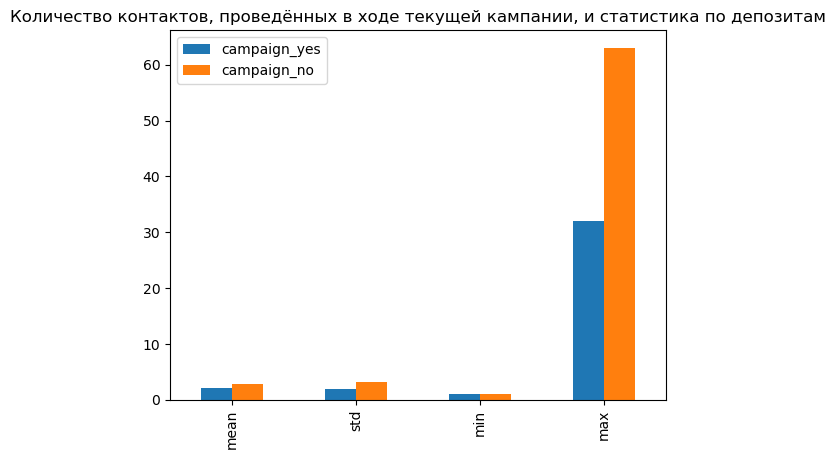

In [24]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Количество контактов, проведённых в ходе текущей кампании, и статистика по депозитам');

In [25]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_df['previous_no'] = (df[df['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


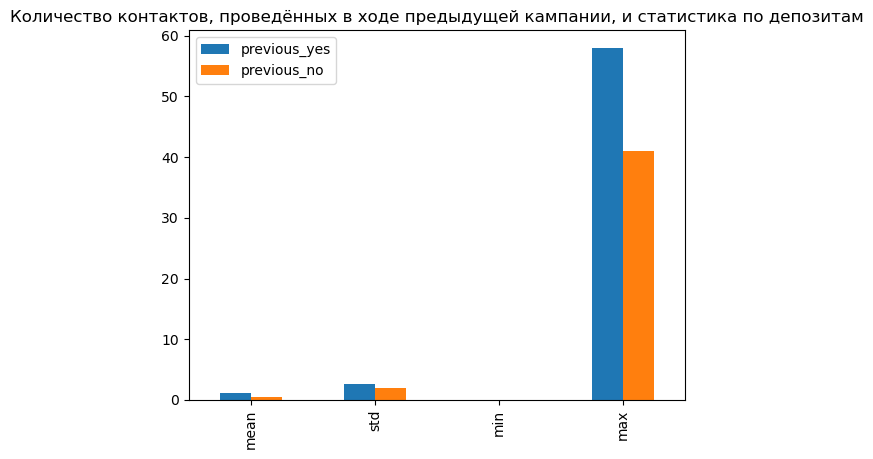

In [26]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Количество контактов, проведённых в ходе предыдущей кампании, и статистика по депозитам');

На основании приведённых диаграмм можно сделать следующие выводы:

- Клиенты, которые сделали вклад в банк (подписались на срочный депозит), как правило, имеют более высокий средний баланс и старше по возрасту.
- Клиенты, которые сделали вклад в банк, чаще всего получали меньше звонков или обращений в ходе этой маркетинговой кампании.

Эти наблюдения могут помочь лучше понять поведение клиентов и способствовать разработке более эффективных стратегий проведения маркетинговых кампаний.

## Очистка данных

Прежде чем мы сможем применить методы машинного обучения, необходимо подготовить набор данных к обработке:

1. Преобразовать столбцы со значениями 'yes' и 'no' в булевы (логические) переменные (например, 1 — да, 0 — нет).
2. Преобразовать категориальные столбцы в фиктивные переменные (dummy variables), используя метод one-hot encoding.

In [27]:
def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0

def get_correct_values(row, column_name, threshold, df):
    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

def clean_data(df):
    '''
    ВХОДНЫЕ ДАННЫЕ
    df - датафрейм pandas, содержащий набор данных банковской маркетинговой кампании

    ВЫХОДНЫЕ ДАННЫЕ
    df - очищенный набор данных:

    столбцы со значениями 'yes' и 'no' преобразованы в булевы переменные;
    категориальные столбцы преобразованы в фиктивные переменные (dummy variables);
    удалены нерелевантные столбцы;
    заменены некорректные значения (импутация).
    '''
    
    cleaned_df = df.copy()   
    bool_columns = ['default', 'housing', 'loan', 'deposit']
    for bool_col in bool_columns:
        cleaned_df[bool_col + '_bool'] = df.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = bool_columns)
    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
    
    for col in  cat_columns:
        cleaned_df = pd.concat([cleaned_df.drop(col, axis=1),
                                pd.get_dummies(cleaned_df[col], prefix=col, prefix_sep='_',
                                               drop_first=True, dummy_na=False)], axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['pdays'])
    cleaned_df['campaign_cleaned'] = df.apply(lambda row: get_correct_values(row, 'campaign', 34, cleaned_df),axis=1)
    cleaned_df['previous_cleaned'] = df.apply(lambda row: get_correct_values(row, 'previous', 34, cleaned_df),axis=1)
    
    cleaned_df = cleaned_df.drop(columns = ['campaign', 'previous'])
    
    return cleaned_df

In [28]:
cleaned_df = clean_data(df)
cleaned_df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,deposit_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,56,45,5,1467,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,41,1270,5,1389,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,55,2476,5,579,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,54,184,5,673,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,2.0,0.0


# Машинное обучение для прогнозирования результатов рекламной кампании

Теперь воспользуемся очищенными данными для прогнозирования результата маркетинговой кампании с помощью моделей классификации машинного обучения.

XGBoost — одна из самых популярных и эффективных библиотек машинного обучения для решения задач классификации и регрессии.

Построенная модель также поможет понять, какие признаки наиболее важны для прогнозирования результатов кампании.

Шаги:
- Создадим матрицу признаков `X` и целевую переменную `y` для обучения модели.
- Разделим данные на обучающую и тестовую выборки в соотношении 70/30

In [29]:
X = cleaned_df.drop(columns = 'deposit_bool')
y = cleaned_df[['deposit_bool']]

In [30]:
TEST_SIZE = 0.3
RAND_STATE = 42

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

In [32]:
xgb = xgboost.XGBClassifier(
                            n_estimators=100, 
                            learning_rate=0.08, 
                            gamma=0, 
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7)

xgb.fit(X_train,y_train.squeeze().values)


y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))



XGB accuracy score for train: 0.914: test: 0.850


In [33]:

param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.08],
    'gamma': [0],
    'subsample': [0.75],
    'bootstrap': [True, False],
    'max_depth':[7]
     }

randomized_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=RAND_STATE,
    n_jobs=-1
)

randomized_search_xgb.fit(X_train, y_train)

best_params_xgb = randomized_search_xgb.best_params_
print(f"Лучшие гипперпараметры для Random Forest: {best_params_xgb}")

best_xgb_model = randomized_search_xgb.best_estimator_

xgb_predicted = best_xgb_model.predict(X_test)

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)

print("\nТочность xgb:", xgb_acc_score * 100, '\n')
print("Отчет о классификации - xgb:")
print(classification_report(y_test, xgb_predicted))

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие гипперпараметры для Random Forest: {'subsample': 0.75, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.08, 'gamma': 0, 'bootstrap': True}

Точность xgb: 84.98059122126008 

Отчет о классификации - xgb:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1742
           1       0.83      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



C:\anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [01:37:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)


Оценим важность признаков из обученной модели:

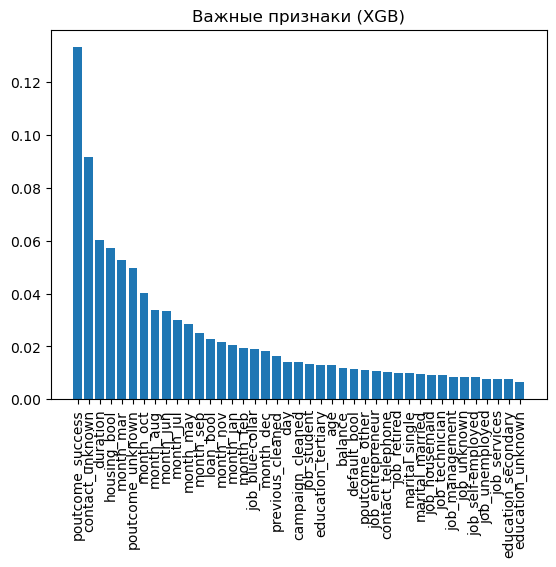

In [34]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Важные признаки (XGB)')

plt.show()

Как видно из диаграммы важности признаков, наиболее значимыми факторами являются:

* Баланс счета клиента,
*  Возраст клиента,
* Количество контактов, проведённых в ходе текущей кампании, и длительность этих контактов,
* Количество контактов, проведённых с клиентом до начала текущей кампании.

Основные выводы, которые можно сделать на основе построенной модели:
* Клиенты старшего возраста с большей вероятностью решаются на оформление срочного депозита.
* Чем выше баланс клиента, тем больше вероятность, что он откроет срочный вклад.
* Количество контактов с клиентом играет важную роль: слишком большое число обращений может привести к отказу клиента.

Эти результаты могут быть использованы для улучшения таргетинга и повышения эффективности маркетинговых кампаний.

In [35]:

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=RAND_STATE,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

best_params_rf = randomized_search_rf.best_params_
print(f"Лучшие гипперпараметры для Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

print("\nТочность Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Отчет о классификации - Random Forest:")
print(classification_report(y_test, rf_predicted))

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Лучшие гипперпараметры для Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}

Точность Random Forest Classifier: 84.41325768886234 

Отчет о классификации - Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1742
           1       0.82      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



Давайте попробуем сформулировать более конкретные рекомендации:

Определим уровень баланса, на который должна быть направлена маркетинговая кампания:

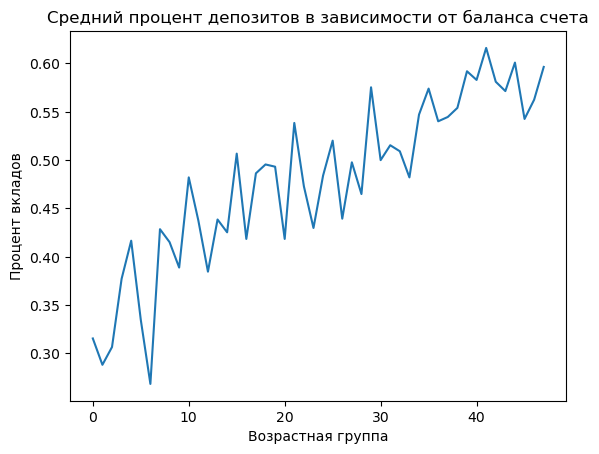

In [36]:
df_new = cleaned_df.copy()


df_new['balance_buckets'] = pd.qcut(df_new['balance'], 50, labels=False, duplicates = 'drop')


mean_deposit = df_new.groupby(['balance_buckets'])['deposit_bool'].mean()

plt.plot(mean_deposit.index, mean_deposit.values)
plt.title('Средний процент депозитов в зависимости от баланса счета')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент вкладов')
plt.show()

In [37]:
df_new[df_new['balance_buckets'] == 34]['balance'].min()

1490

Из приведенной выше диаграммы можно сделать вывод, что маркетинговым кампаниям следует сосредоточиться на клиентах с балансом счета более 1490 долларов.

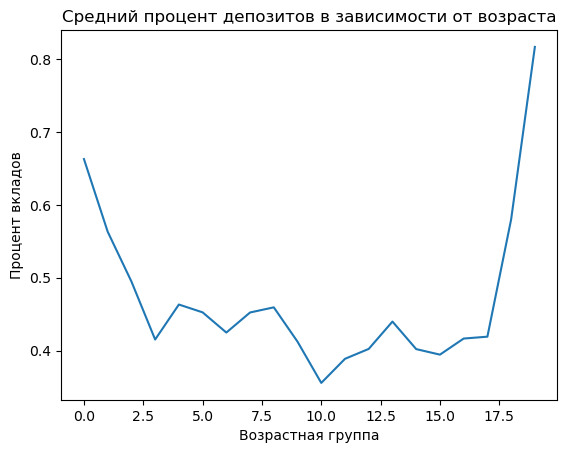

In [38]:
df_new['age_buckets'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')


mean_age = df_new.groupby(['age_buckets'])['deposit_bool'].mean()

#plot
plt.plot(mean_age.index, mean_age.values)
plt.title('Средний процент депозитов в зависимости от возраста')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент вкладов')
plt.show()

Итак, мы видим, что средний уровень вкладов выше у клиентов младше 31 года или старше 56 лет.



Определим оптимальное количество контактов с клиентом в ходе кампании:

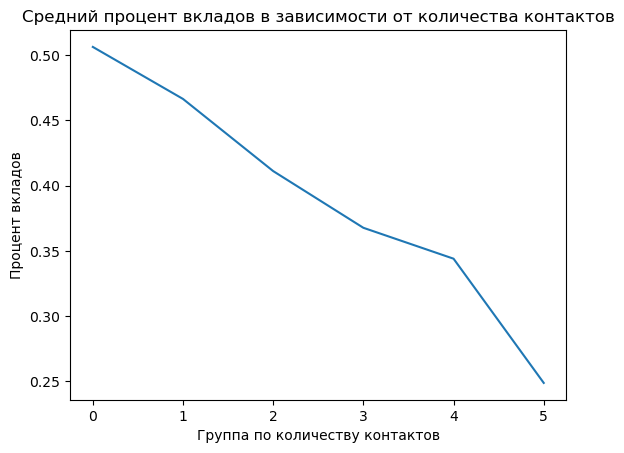

In [39]:
df_new['campaign_buckets'] = pd.qcut(df_new['campaign_cleaned'], 20, labels=False, duplicates = 'drop')

#group by 'balance_buckets' and find average campaign outcome per balance bucket
mean_campaign = df_new.groupby(['campaign_buckets'])['deposit_bool'].mean()

#plot average campaign outcome per bucket 
plt.plot(mean_campaign.index, mean_campaign.values)
plt.title('Средний процент вкладов в зависимости от количества контактов')
plt.xlabel('Группа по количеству контактов')
plt.ylabel('Процент вкладов')
plt.show()




In [40]:
df_new[df_new['campaign_buckets'] == 2]['campaign_cleaned'].min()

4.0

Из приведенного выше графика видно, что средний уровень вкладов падает ниже 50%, если количество контактов(звонков и других способов связаться с клиентом) во время кампании превышает 4.

# Заключение


Ключевые выводы анализа сформулированы в виде рекомендаций для будущих маркетинговых кампаний:

- Баланс счета клиента оказывает большое влияние на результат кампании. Клиенты с балансом выше 1490$ чаще делают вклад на срочный депозит, поэтому в будущем следует целиться на этих клиентов.
- Возраст клиента также влияет на результат кампании. Стоит сосредоточиться на возрастных группах младше 30 лет и старше 50 лет.
- Количество контактов с клиентом в ходе кампании играет важную роль. Число контактов не должно превышать 4, иначе вероятность подписки снижается.
- Обучено 2 модели  точность которых 
    - xgb: 84.98
    - Random Forest Classifier: 84.4
- Модель XGBClassifier показала себя лучшей.
